In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pingouin as pg
%matplotlib inline

In [2]:
data = pd.read_csv('Davey.csv')

In [5]:
data['MoodX'] = data['Mood'].replace({1:'negative',2:'positive',3:'neutral'})
data['Stop_RuleX'] = data['Stop_Rule'].replace({1:"as many as you can",2:'feel linke continuing'})

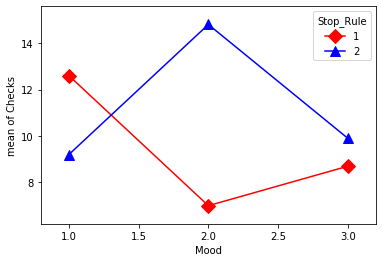

In [7]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(data.Mood, data.Stop_Rule, data.Checks,
             colors=['red','blue'], markers=['D','^'], ms=10)

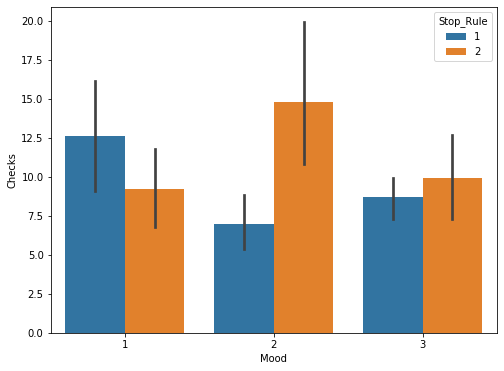

In [8]:
plt.figure(figsize=(8,6))
_ = sns.barplot(x='Mood', y='Checks', hue='Stop_Rule', data=data)

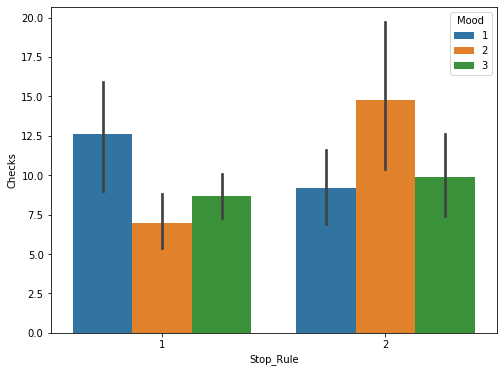

In [9]:
plt.figure(figsize=(8,6))
_ = sns.barplot(x='Stop_Rule', y='Checks', hue='Mood', data=data)

In [10]:
data.groupby(['Stop_Rule', 'Mood'])['Checks'].describe()

count  mean       std  min   25%   50%    75%   max
Stop_Rule Mood                                                     
1         1      10.0  12.6  6.022181  5.0  7.75  12.0  15.25  24.0
          2      10.0   7.0  2.981424  3.0  4.25   7.0   9.00  12.0
          3      10.0   8.7  2.359378  5.0  7.25   9.5  10.75  11.0
2         1      10.0   9.2  3.994441  3.0  7.25   8.5  12.75  15.0
          2      10.0  14.8  7.857056  8.0  8.75  12.0  17.75  31.0
          3      10.0   9.9  4.629615  5.0  6.25   9.0  13.25  19.0

In [11]:
unique_list = [1,2,3,4,5,6]
unique_list

[1, 2, 3, 4, 5, 6]

In [12]:
data['interaction'] = 0

In [13]:
for i in range(6):
    for j in range(10):
        data.at[10*i+j,'interaction'] = unique_list[i]

### Levene Test

In [16]:
pg.homoscedasticity(data, dv='Checks',group='interaction')

,W,pval,equal_var
levene,1.729096,0.143645,True


#### Levene’s  test  is non-significant, indicating that there is no problem with homogeneity of variance.

In [18]:
con1 = [1, 1, -2]
con2 = [-1, 1, 0]
contrast = np.vstack((con1, con2))
contrast_mood = contrast.T
contrast_mood

array([[ 1, -1],
       [ 1,  1],
       [-2,  0]])

In [19]:
contrast_tr = np.array([[1,-1]])
contrast_tr =contrast_tr.reshape(2,1)
contrast_tr

array([[ 1],
       [-1]])

In [20]:
m02 = smf.ols('Checks~C(Mood,contrast_mood)*C(Stop_Rule, contrast_tr)', data=data).fit()
m02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Checks   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     3.230
Date:                Sun, 16 Aug 2020   Prob (F-statistic):             0.0127
Time:                        18:40:22   Log-Likelihood:                -178.51
No. Observations:                  60   AIC:                             369.0
Df Residuals:                      54   BIC:                             381.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                             10.3667      0.645     16.068      0.000       9.073      11.660
C(Mood, contrast_mood)[custom0]                                        0.5333      0.456      1.169      0.248      -0.381       1.448
C(Mood, contrast_mood)[custom1]                                    -8.327e-17      0.790  -1.05e-16      1.000      -1.584       1.584
C(Stop_Rule, contrast_tr)[custom0]                                    -0.9333      0.645     -1.447      0.154      -2.227       0.360
C(Mood, contrast_mood)[custom0]:C(Stop_Rule, contrast_tr)[custom0]    -0.1667      0.456     -0.365      0.716      -1.081       0.748
C(Mood, contrast_mood)[custom1]:C(Stop_Rule, contrast_tr)[custom0]    -2.8000      0.790     -3.544      0.001      -4.384      -1.216
==============================================================================
Omnibus:                       12.031   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.522
Skew:                           0.950   Prob(JB):                      0.00191
Kurtosis:                       4.182   Cond. No.                         1.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
sm.stats.anova_lm(m02,typ=3)

,sum_sq,df,F,PR(>F)
Intercept,6448.066667,1.0,258.190420,3.152592e-22
"C(Mood, contrast_mood)",34.133333,2.0,0.683375,5.092224e-01
"C(Stop_Rule, contrast_tr)",52.266667,1.0,2.092837,1.537711e-01
"C(Mood, contrast_mood):C(Stop_Rule, contrast_tr)",316.933333,2.0,6.345247,3.348924e-03
Residual,1348.600000,54.0,NaN,NaN


#### **The  main  effect  of  mood  was  not  significant, F(2,  54)  =  0.68, p > .05, indicating that the number of checks (when we ignore the stop rule adopted) was roughly the same regardless of whether the person was in a positive, negative or neutral mood. Similarly, the main effect of stop  rule  was  not  significant, F(1,  54)  =  2.09, p > .05, indicating that the number of checks (when we ignore the mood induced) was roughly the same regardless of whether the person used an ‘as many as can’ or a ‘feel like continuing’ stop rule. The mood × stop rule interaction was significant, F(2, 54) = 6.35, p < .01, indicating that the mood combined with the stop rule affected  checking  behaviour.  Looking  at  the  graph, a negative  mood  in  combination  with  an ‘as  many  as  can’  stop  rule  increased  checking  as  did  the  combination  of  a  ‘feel  like continuing’ stop rule and a positive mood.**

In [23]:
m01 = smf.ols('Checks~C(Mood)*C(Stop_Rule)', data=data).fit()
m01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Checks   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     3.230
Date:                Sun, 16 Aug 2020   Prob (F-statistic):             0.0127
Time:                        18:49:09   Log-Likelihood:                -178.51
No. Observations:                  60   AIC:                             369.0
Df Residuals:                      54   BIC:                             381.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         12.6000      1.580      7.973      0.000       9.432      15.768
C(Mood)[T.2]                      -5.6000      2.235     -2.506      0.015     -10.081      -1.119
C(Mood)[T.3]                      -3.9000      2.235     -1.745      0.087      -8.381       0.581
C(Stop_Rule)[T.2]                 -3.4000      2.235     -1.521      0.134      -7.881       1.081
C(Mood)[T.2]:C(Stop_Rule)[T.2]    11.2000      3.161      3.544      0.001       4.863      17.537
C(Mood)[T.3]:C(Stop_Rule)[T.2]     4.6000      3.161      1.455      0.151      -1.737      10.937
==============================================================================
Omnibus:                       12.031   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.522
Skew:                           0.950   Prob(JB):                      0.00191
Kurtosis:                       4.182   Cond. No.                         9.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
prediction = pd.DataFrame(m01.fittedvalues)
prediction.columns = ['predicted'] 
prediction.tail()

,predicted
55,9.9
56,9.9
57,9.9
58,9.9
59,9.9


In [26]:
prediction['standarized_prediction']  = (prediction['predicted']-prediction['predicted'].mean())/prediction['predicted'].std()

In [27]:
import statsmodels.stats.outliers_influence as sms

In [28]:
summary_frame = sms.OLSInfluence(m01).summary_frame()

In [29]:
summary_frame = pd.merge(summary_frame, prediction, how = 'inner', left_index = True, right_index = True)

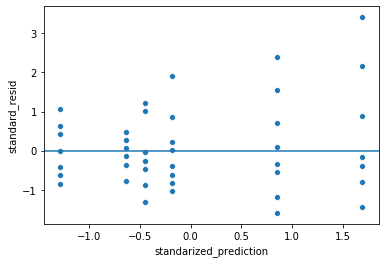

In [32]:
_ = sns.scatterplot(y = 'standard_resid', x='standarized_prediction', data = summary_frame)
_ = plt.axhline(y=0)

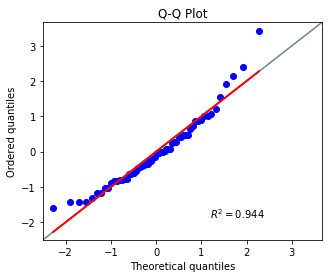

In [33]:
_ = pg.qqplot(summary_frame['standard_resid'], confidence=False)

### ***The first graph below (on the left) can be used for testing homogeneity of variance: if it has a funnel shape then we’re in trouble. The plot we have does show funnelling, which implies that the  residuals  might  be  heteroscedastic.  The  second  plot  is  a  Q-Q plot, which tells about the normality  of  residuals  in  the  model.  We  want  our  residuals to  be  normally  distributed, which means  that  the  dots  on  the  graph  should  hover  around  the  diagonal  line.  On  ours,  there  is only  some  deviation  from  the  line, suggesting that we can assume normality of our residuals/errors.***